In [1]:
# installing and loading required packages
if(!("plyr" %in% rownames(installed.packages()) && "nclSLR" %in% rownames(installed.packages()) && "mlbench" %in% rownames(installed.packages()))){
  install.packages("plyr")
  install.packages("nclSLR", repos="http://R-Forge.R-project.org")
  install.packages("mlbench")
}

library(plyr)
library(nclSLR)
library(mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘nclSLR’


The following object is masked from ‘package:datasets’:

    USArrests




In [2]:
# Loading the BreastCancer dataset (part of mlbench package)
data(BreastCancer)
dim(BreastCancer)
head(BreastCancer, 3)

[1] 699  11

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign


In [3]:
# Number of samples for each of the two classes
table(BreastCancer$Class)


   benign malignant 
      458       241 

In [4]:
# Checking how many rows with NA and removing them
cat("The number of samples with one or more NA is = ", sum(is.na(BreastCancer)), "\n\n")
BreastCancer_clean = na.omit(BreastCancer[2:11])

# Checking smaples per class after removing samples with NA
cat("The number of samples per class after removing rows with NA is =")
table(BreastCancer_clean$Class)

The number of samples with one or more NA is =  16 

The number of samples per class after removing rows with NA is =


   benign malignant 
      444       239 

In [5]:
# Comparing original and new dataset
cat("The number of samples in the original dataset is = ", nrow(BreastCancer), "\n\n")

cat("The number of samples the cleaned dataset is = ", nrow(BreastCancer_clean))

The number of samples in the original dataset is =  699 

The number of samples the cleaned dataset is =  683

In [6]:
head(BreastCancer_clean)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


In [7]:
# Converting data points from factors to quantitative variables
for(i in 1:10){
  BreastCancer_clean[, i] = as.numeric(BreastCancer_clean[, i])
}

# Adopting standard 0/1 form for the labels
BreastCancer_clean[, 10] = BreastCancer_clean[, 10] - 1

In [8]:
# Checking the first 3 rows
head(BreastCancer_clean)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,1,1,1,2,1,3,1,1,0
2,5,4,4,5,7,10,3,2,1,0
3,3,1,1,1,2,2,3,1,1,0
4,6,8,8,1,3,4,3,7,1,0
5,4,1,1,3,2,1,3,1,1,0
6,8,10,10,8,7,10,9,7,1,1


# Exploratory Data Analysis

## Numerical Summaries

In [9]:
# Numerical summary of the data
summary(BreastCancer_clean)

  Cl.thickness      Cell.size        Cell.shape     Marg.adhesion  
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.00  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.00  
 Mean   : 4.442   Mean   : 3.151   Mean   : 3.215   Mean   : 2.83  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
  Epith.c.size     Bare.nuclei      Bl.cromatin     Normal.nucleoli
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.00  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.00  
 Mean   : 3.234   Mean   : 3.545   Mean   : 3.445   Mean   : 2.87  
 3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 4.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
    Mitoses          Class       
 Min.   :1.000

In [10]:
pred = colnames(BreastCancer_clean)
for(j in 1:9){
  print(pred[j])
  print(table(BreastCancer_clean[,j]))
}

[1] "Cl.thickness"

  1   2   3   4   5   6   7   8   9  10 
139  50 104  79 128  33  23  44  14  69 
[1] "Cell.size"

  1   2   3   4   5   6   7   8   9  10 
373  45  52  38  30  25  19  28   6  67 
[1] "Cell.shape"

  1   2   3   4   5   6   7   8   9  10 
346  58  53  43  32  29  30  27   7  58 
[1] "Marg.adhesion"

  1   2   3   4   5   6   7   8   9  10 
393  58  58  33  23  21  13  25   4  55 
[1] "Epith.c.size"

  1   2   3   4   5   6   7   8   9  10 
 44 376  71  48  39  40  11  21   2  31 
[1] "Bare.nuclei"

  1   2   3   4   5   6   7   8   9  10 
402  30  28  19  30   4   8  21   9 132 
[1] "Bl.cromatin"

  1   2   3   4   5   6   7   8   9  10 
150 160 161  39  34   9  71  28  11  20 
[1] "Normal.nucleoli"

  1   2   3   4   5   6   7   8   9  10 
432  36  42  18  19  22  16  23  15  60 
[1] "Mitoses"

  1   2   3   4   5   6   7   8   9 
563  35  33  12   6   3   9   8  14 


In [11]:
cov(BreastCancer_clean)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Cl.thickness,7.9566944,5.554922,5.508800,3.9417762,3.283363,6.096061,3.8263655,4.598758,1.6363894,0.9623491
Cell.size,5.5549220,9.395113,8.310604,6.2074683,5.134708,7.725660,5.6732481,6.730824,2.3342808,1.2008175
Cell.shape,5.5087998,8.310604,8.931615,5.8723846,4.799947,7.774099,5.3835352,6.550081,2.1852488,1.1723765
Marg.adhesion,3.9417762,6.207468,5.872385,8.2057165,3.786179,7.000264,4.6915411,5.274024,1.9920761,0.9656767
Epith.c.size,3.2833626,5.134708,4.799947,3.7861792,4.942109,4.744656,3.3662533,4.268107,1.7503875,0.7331550
Bare.nuclei,6.0960615,7.725660,7.774099,7.0002641,4.744656,13.277695,6.0754026,6.499229,2.0809779,1.4308317
Bl.cromatin,3.8263655,5.673248,5.383535,4.6915411,3.366253,6.075403,6.0010133,4.977439,1.4176717,0.8865429
Normal.nucleoli,4.5987579,6.730824,6.550081,5.2740239,4.268107,6.499229,4.9774391,9.318772,2.1830827,1.0471312
Mitoses,1.6363894,2.334281,2.185249,1.9920761,1.750388,2.080978,1.4176717,2.183083,2.6775310,0.3368462
Class,0.9623491,1.200818,1.172376,0.9656767,0.733155,1.430832,0.8865429,1.047131,0.3368462,0.2278116


In [12]:
cor(BreastCancer_clean)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Cl.thickness,1.0000000,0.6424815,0.6534700,0.4878287,0.5235960,0.5930914,0.5537424,0.5340659,0.3545301,0.7147899
Cell.size,0.6424815,1.0000000,0.9072282,0.7069770,0.7535440,0.6917088,0.7555592,0.7193460,0.4654091,0.8208014
Cell.shape,0.6534700,0.9072282,1.0000000,0.6859481,0.7224624,0.7138775,0.7353435,0.7179634,0.4468571,0.8218909
Marg.adhesion,0.4878287,0.7069770,0.6859481,1.0000000,0.5945478,0.6706483,0.6685671,0.6031211,0.4249917,0.7062941
Epith.c.size,0.5235960,0.7535440,0.7224624,0.5945478,1.0000000,0.5857161,0.6181279,0.6289264,0.4811836,0.6909582
Bare.nuclei,0.5930914,0.6917088,0.7138775,0.6706483,0.5857161,1.0000000,0.6806149,0.5842802,0.3490108,0.8226959
Bl.cromatin,0.5537424,0.7555592,0.7353435,0.6685671,0.6181279,0.6806149,1.0000000,0.6656015,0.3536683,0.7582276
Normal.nucleoli,0.5340659,0.7193460,0.7179634,0.6031211,0.6289264,0.5842802,0.6656015,1.0000000,0.4370424,0.7186772
Mitoses,0.3545301,0.4654091,0.4468571,0.4249917,0.4811836,0.3490108,0.3536683,0.4370424,1.0000000,0.4312971
Class,0.7147899,0.8208014,0.8218909,0.7062941,0.6909582,0.8226959,0.7582276,0.7186772,0.4312971,1.0000000


## Graphical Summaries

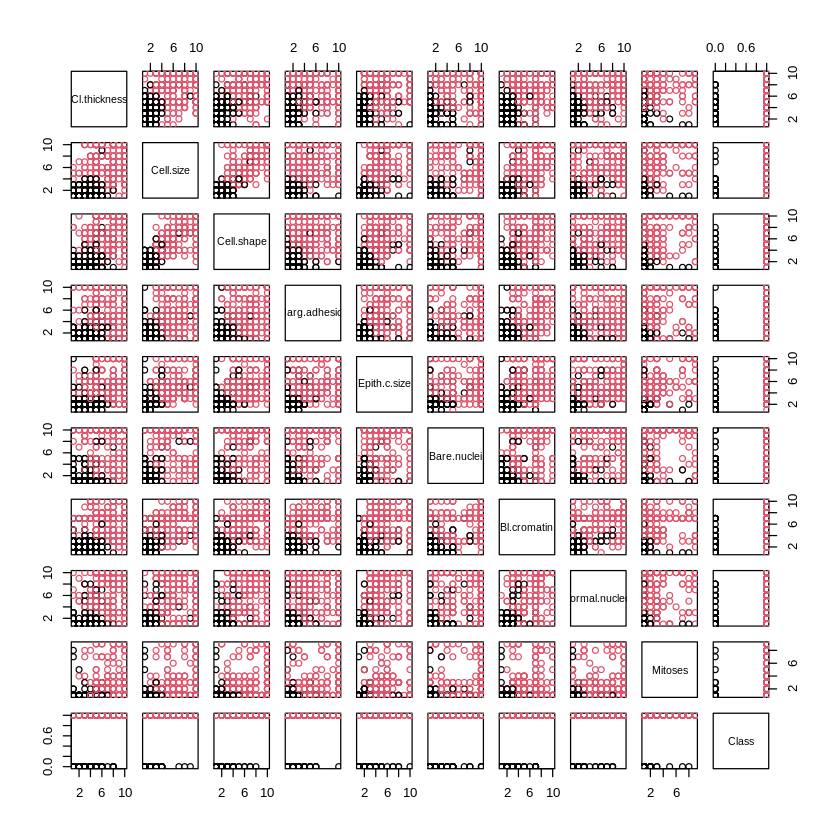

In [13]:
# Generating Pairs Plot
y = BreastCancer_clean[, 10]
pairs(BreastCancer_clean, col = y+1)

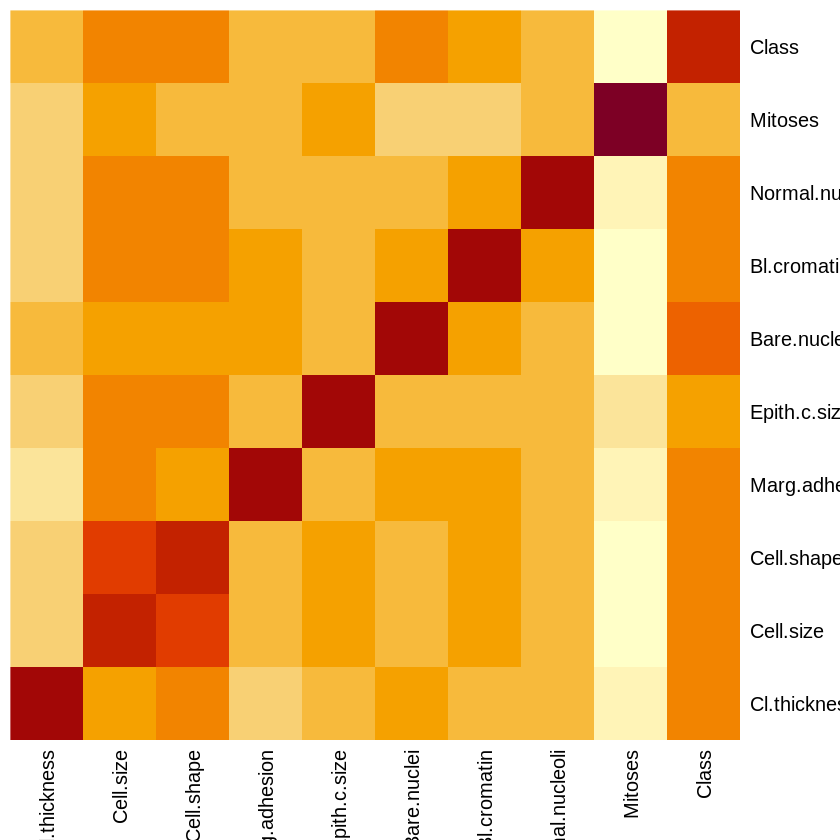

In [14]:
# Generating Heatmap of covariance martix - showing repationship strength between predictors
heatmap(cor(BreastCancer_clean), Rowv = NA, Colv = NA)

From the above summaries we have:
- Only cell size and cell shape show a linear repationship.
- Remaining predictors don't show any definitive relationship and have a relatively even spread.

# Classifiers

## 01 Logistic Regression

In [15]:
# Scaling data for logistic regression
X_orig = BreastCancer_clean[, 1:9]
X_scaled = scale(X_orig)

Y = BreastCancer_clean[, 10]

BreastCancer_Data = data.frame(X_scaled, y)

head(BreastCancer_Data)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1977598,-0.7016978,-0.7412304,-0.63889730,-0.5552016,-0.6983413,-0.181694,-0.6124785,-0.356119,0
2,0.1977598,0.2770488,0.2625905,0.75747664,1.6939247,1.7715689,-0.181694,-0.2848960,-0.356119,0
3,-0.5112687,-0.7016978,-0.7412304,-0.63889730,-0.5552016,-0.4239068,-0.181694,-0.6124785,-0.356119,0
4,0.5522740,1.5820442,1.6010185,-0.63889730,-0.1053763,0.1249621,-0.181694,1.3530163,-0.356119,0
5,-0.1567545,-0.7016978,-0.7412304,0.05928967,-0.5552016,-0.6983413,-0.181694,-0.6124785,-0.356119,0
6,1.2613024,2.2345419,2.2702324,1.80475710,1.6939247,1.7715689,2.267589,1.3530163,-0.356119,1


In [16]:
# Fitting the logistic regression model
n = nrow(BreastCancer_Data)
p = ncol(BreastCancer_Data) - 1

log_reg_fit = glm(y ~ ., data=BreastCancer_Data, family="binomial")

In [17]:
# Summary of logistic model
summary(log_reg_fit)


Call:
glm(formula = y ~ ., family = "binomial", data = BreastCancer_Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4855  -0.1152  -0.0619   0.0222   2.4702  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.10357    0.32011  -3.448 0.000566 ***
Cl.thickness     1.50983    0.40037   3.771 0.000163 ***
Cell.size       -0.01822    0.64110  -0.028 0.977332    
Cell.shape       0.96273    0.68930   1.397 0.162510    
Marg.adhesion    0.94729    0.35366   2.679 0.007395 ** 
Epith.c.size     0.21519    0.34806   0.618 0.536415    
Bare.nuclei      1.39565    0.34203   4.080 4.49e-05 ***
Bl.cromatin      1.09600    0.41986   2.610 0.009044 ** 
Normal.nucleoli  0.65044    0.34463   1.887 0.059109 .  
Mitoses          0.88124    0.53281   1.654 0.098138 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 884.35  on 682  degrees 

Inspecting the p-value column from the summary table, we see that only Cl Thickness, Marg Adhesion, Bare Nuclei and Bl Chromatin have the most significant effect on the response.

## Best Subset Selection in Logistic Regression

In [18]:
# installing and loading bestglm package for best subset selection

if(!("bestglm" %in% rownames(installed.packages()))){
  install.packages("bestglm")
}

library(bestglm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘leaps’, ‘glmnet’, ‘grpreg’, ‘pls’


Loading required package: leaps



In [19]:
## Applying best subset selection
bss_fit_AIC = bestglm(BreastCancer_Data, family=binomial, IC="AIC")
bss_fit_BIC = bestglm(BreastCancer_Data, family=binomial, IC="BIC")

Morgan-Tatar search since family is non-gaussian.

Morgan-Tatar search since family is non-gaussian.



In [20]:
## Examining the results
bss_fit_AIC$Subsets

bss_fit_BIC$Subsets

,Intercept,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,logLikelihood,AIC
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,-442.17509,884.3502
1,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,-127.37980,256.7596
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,-83.15598,170.3120
3,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,-67.77778,141.5556
4,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,-61.37155,130.7431
5,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,-56.13177,122.2635
6,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,-53.57186,119.1437
7*,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,-51.63998,117.2800
8,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,-51.45031,118.9006


,Intercept,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,logLikelihood,BIC
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,-442.17509,884.3502
1,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,-127.37980,261.2861
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,-83.15598,179.3649
3,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,-67.77778,155.1351
4,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,-61.37155,148.8491
5*,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,-56.13177,144.8960
6,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,-53.57186,146.3027
7,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,-51.63998,148.9654
8,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,-51.45031,155.1126


In [21]:
## Identify best-fitting models
(best_AIC = bss_fit_AIC$ModelReport$Bestk)

(best_BIC = bss_fit_BIC$ModelReport$Bestk)

[1] 7

[1] 5

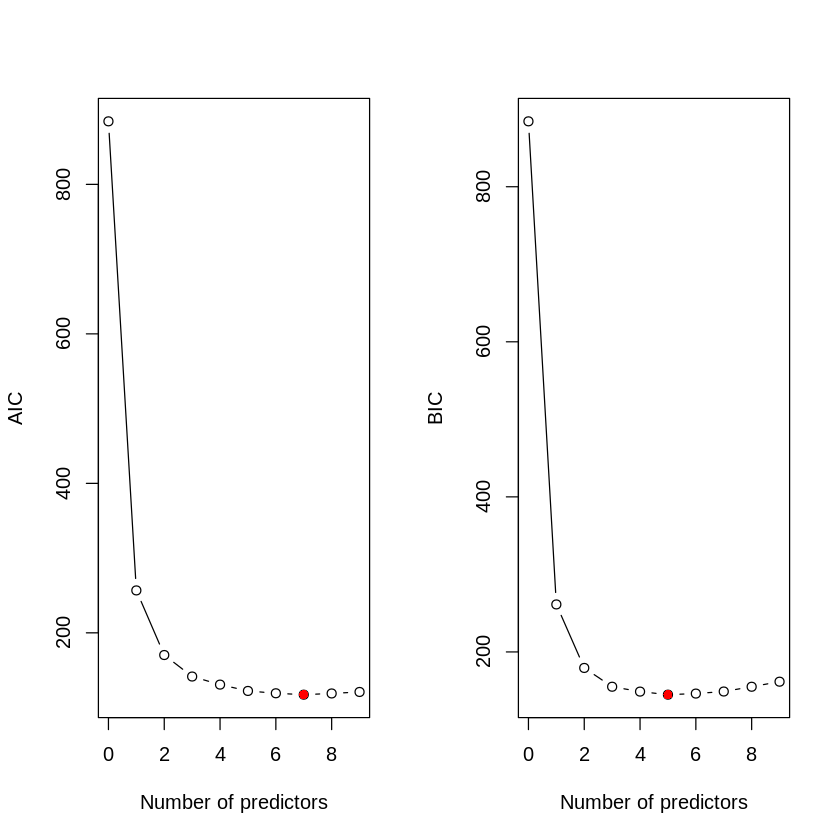

In [22]:
# Generating a plot to show how the criteria vary with the number of predictors
par(mfrow=c(1,2))

plot(0:p, bss_fit_AIC$Subsets$AIC, xlab="Number of predictors", ylab="AIC", type="b")
points(best_AIC, bss_fit_AIC$Subsets$AIC[best_AIC+1], col="red", pch=16)
plot(0:p, bss_fit_BIC$Subsets$BIC, xlab="Number of predictors", ylab="BIC", type="b")
points(best_BIC, bss_fit_BIC$Subsets$BIC[best_BIC+1], col="red", pch=16)

From the above plots, it is evident that a model with 6 predictors seems to be a good compromise.

In [23]:
# Extracting the variables from the best-fitting 6-predictor model
pstar = 6
# Check which predictors are in the 1-predictor model
bss_fit_AIC$Subsets[pstar+1,]

,Intercept,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,logLikelihood,AIC
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>
6,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,-53.57186,119.1437


In [24]:
# Constructing a reduced data set containing only the selected predictor
(indices = as.logical(bss_fit_AIC$Subsets[pstar+1, 2:(p+1)]))

BreastCancer_Data_reduced = data.frame(X_scaled[,indices], y)

head(BreastCancer_Data_reduced)

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

,Cl.thickness,Cell.shape,Marg.adhesion,Bare.nuclei,Bl.cromatin,Normal.nucleoli,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1977598,-0.7412304,-0.63889730,-0.6983413,-0.181694,-0.6124785,0
2,0.1977598,0.2625905,0.75747664,1.7715689,-0.181694,-0.2848960,0
3,-0.5112687,-0.7412304,-0.63889730,-0.4239068,-0.181694,-0.6124785,0
4,0.5522740,1.6010185,-0.63889730,0.1249621,-0.181694,1.3530163,0
5,-0.1567545,-0.7412304,0.05928967,-0.6983413,-0.181694,-0.6124785,0
6,1.2613024,2.2702324,1.80475710,1.7715689,2.267589,1.3530163,1


In [25]:
# Obtaining regression coefficients for data with reduced predictors
log_reg_fit_reduced = glm(y ~ ., data=BreastCancer_Data_reduced, family="binomial")
summary(log_reg_fit_reduced)


Call:
glm(formula = y ~ ., family = "binomial", data = BreastCancer_Data_reduced)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5201  -0.1186  -0.0570   0.0250   2.4055  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.2592     0.2904  -4.337 1.45e-05 ***
Cl.thickness      1.7560     0.3868   4.540 5.62e-06 ***
Cell.shape        1.0445     0.4932   2.118  0.03419 *  
Marg.adhesion     0.9669     0.3312   2.920  0.00350 ** 
Bare.nuclei       1.3794     0.3418   4.035 5.45e-05 ***
Bl.cromatin       1.1546     0.4069   2.837  0.00455 ** 
Normal.nucleoli   0.7423     0.3314   2.240  0.02509 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 884.35  on 682  degrees of freedom
Residual deviance: 107.14  on 676  degrees of freedom
AIC: 121.14

Number of Fisher Scoring iterations: 8


We see that the selected model uses Cl.thickness, Cell.shape, Marg.adhesion, Bare.nuclei, Bl.cromatin and Normal.nucleoli as predictors and that the coefficients of these predictors in the 6-predictor model are significantly different from zero. These are also positive which suggests that higher values of these cytological characteristics are associated with a higher probability of a malignant type.

## 02 Regulizationwiith Logistic Regression

In [30]:
# getting glmnet library for cross validation
# getting the data package
if(!("glmnet" %in% rownames(installed.packages()))){
  install.packages("glmnet")
  }
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-3



In [36]:
# setting values of lambda for regression analysis
grid = 10^seq(-5, 3, length.out=100)

### Ridge Regression

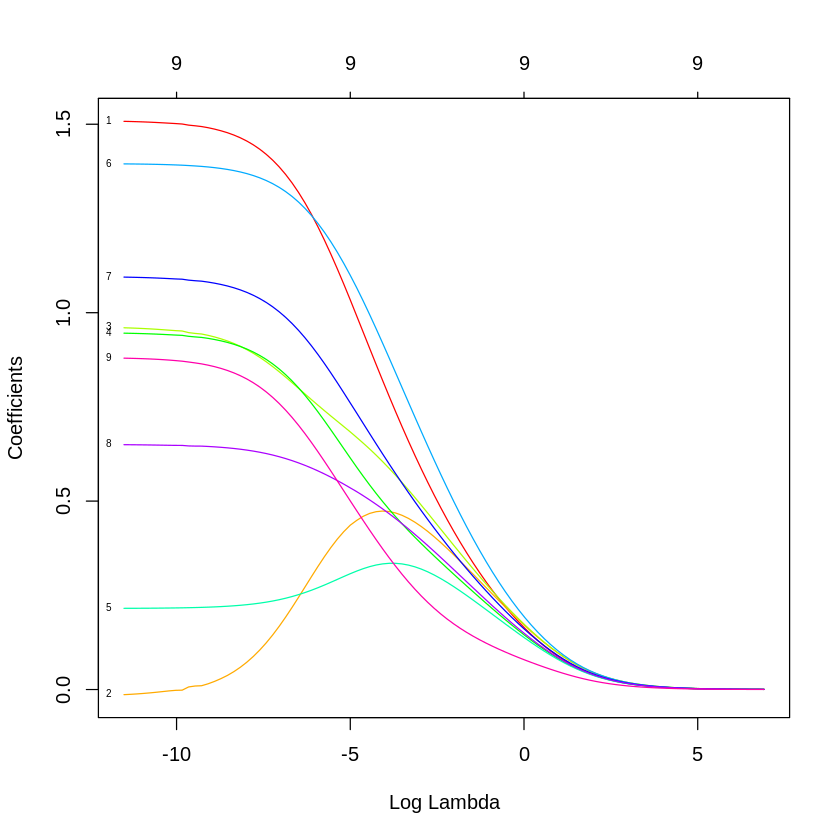

In [37]:
# Applying plotting Ridge regression for complete data
ridge_fit = glmnet(X_scaled, Y, family="binomial", alpha=0, standardize=FALSE, lambda=grid)

plot(ridge_fit, xvar="lambda", col=rainbow(p), label=TRUE)

In [38]:
# crossvalidated ridge regression
ridge_cv_fit = cv.glmnet(X_scaled, Y, family="binomial", alpha=0, standardize=FALSE, lambda=grid, type.measure="class")

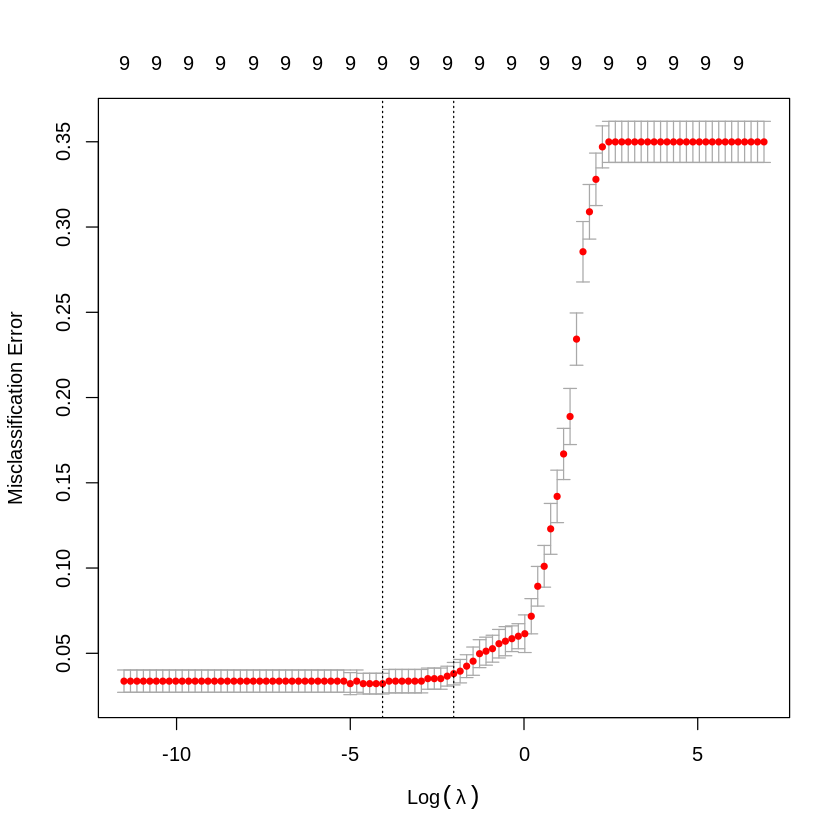

In [39]:
# Plotting cross validated ridge regression classification error vs lambda
plot(ridge_cv_fit)

In [41]:
# Identifying the optimal value for the tuning parameter
(lambda_ridge_min = ridge_cv_fit$lambda.min)

which_lambda_ridge = which(ridge_cv_fit$lambda == lambda_ridge_min)
## Find the parameter estimates associated with optimal value of the tuning parameter
coef(ridge_fit, s=lambda_ridge_min)

[1] 0.01707353

10 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)     -0.9681519
Cl.thickness     0.8203437
Cell.size        0.4735926
Cell.shape       0.6049287
Marg.adhesion    0.4989972
Epith.c.size     0.3333909
Bare.nuclei      0.9192335
Bl.cromatin      0.6252990
Normal.nucleoli  0.4793572
Mitoses          0.3735500

### LASSO Regression

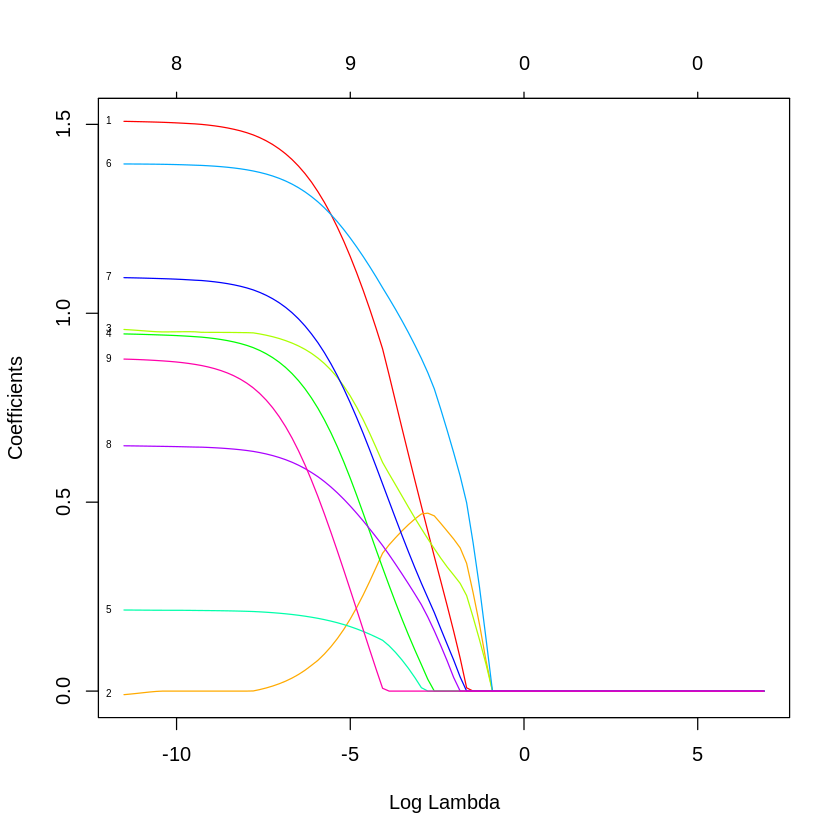

In [42]:
# Applying plotting Ridge regression for complete data
lasso_fit = glmnet(X_scaled, Y, family="binomial", alpha=1, standardize=FALSE, lambda=grid)

plot(lasso_fit, xvar="lambda", col=rainbow(p), label=TRUE)

In [43]:
# crossvalidated ridge regression
lasso_cv_fit = cv.glmnet(X_scaled, Y, family="binomial", alpha=1, standardize=FALSE, lambda=grid, type.measure="class")

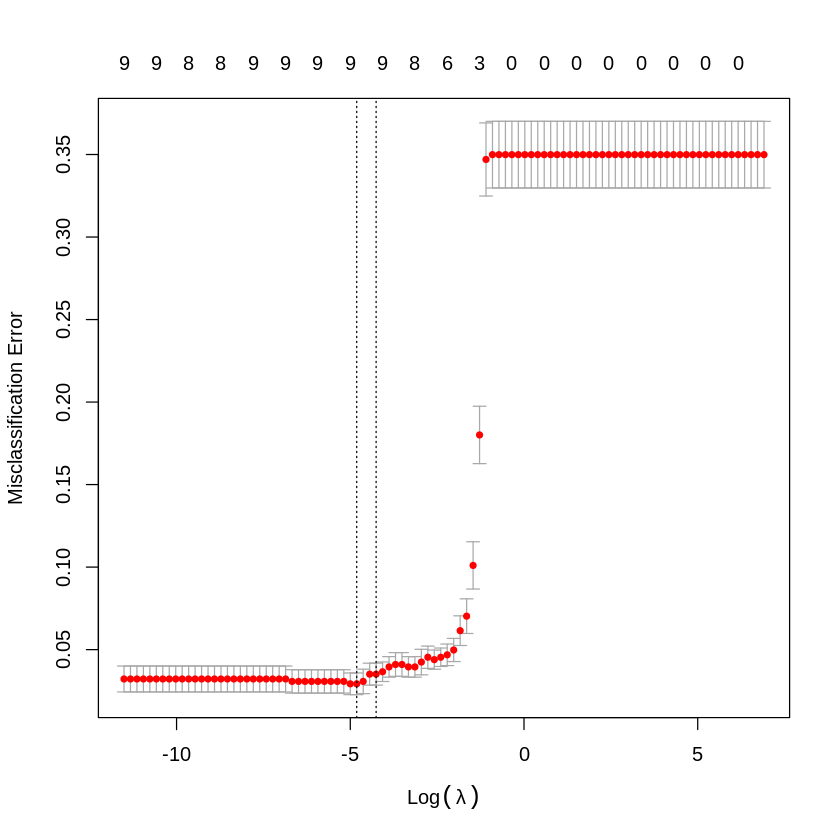

In [44]:
# Plotting cross validated ridge regression classification error vs lambda
plot(lasso_cv_fit)

In [45]:
# Identifying the optimal value for the tuning parameter
(lambda_lasso_min = lasso_cv_fit$lambda.min)

which_lambda_lasso = which(lasso_cv_fit$lambda == lambda_lasso_min)
## Find the parameter estimates associated with optimal value of the tuning parameter
coef(ridge_fit, s=lambda_lasso_min)

[1] 0.008111308

10 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)     -1.0082045
Cl.thickness     0.9911261
Cell.size        0.4488402
Cell.shape       0.6688457
Marg.adhesion    0.5898616
Epith.c.size     0.3143605
Bare.nuclei      1.0659603
Bl.cromatin      0.7334998
Normal.nucleoli  0.5250643
Mitoses          0.4743822

From the parameter coefficients from optimal values of lambda for Ridge and LASSO show similar shrinkage.
Although, LASSO has retained all the parameters, the parameters selected from the Best Subset selection have coefficient values over 0.5.

# 03 Discriminant Analysis

In [58]:
# getting glmnet library for cross validation
# getting the data package
if(!("MASS" %in% rownames(installed.packages()) && "caret" %in% rownames(installed.packages()))){
  install.packages("MASS")
  install.packages("caret")
  }
library(MASS)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Linera Discriminant Analysis (LDA)

Working with all predictors

In [89]:
# LDA on all predictors
lda_allData = lda(y ~ ., data = BreastCancer_Data, CV = TRUE, prior = c(0.998, 0.002))      # remove prior = c(0.998, 0.002) for in-sample approximation

In [90]:
# LDA all predictor classificaion accuracy
conf1 <- table(list(predicted=lda_allData$class, observed=BreastCancer_Data$y))
confusionMatrix(conf1)

Confusion Matrix and Statistics

         observed
predicted   0   1
        0 439  42
        1   5 197
                                         
               Accuracy : 0.9312         
                 95% CI : (0.9095, 0.949)
    No Information Rate : 0.6501         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8431         
                                         
 Mcnemar's Test P-Value : 1.512e-07      
                                         
            Sensitivity : 0.9887         
            Specificity : 0.8243         
         Pos Pred Value : 0.9127         
         Neg Pred Value : 0.9752         
             Prevalence : 0.6501         
         Detection Rate : 0.6428         
   Detection Prevalence : 0.7042         
      Balanced Accuracy : 0.9065         
                                         
       'Positive' Class : 0              
                                         

Working with best predictors as identified by best subset selection

Cl.thickness, Cell.shape, Marg.adhesion, Bare.nuclei, Bl.cromatin, Normal.nucleoli

In [91]:
# LDA on all 6 predictors
lda_bss_Data = lda(y ~ Cl.thickness + Cell.shape + Marg.adhesion + Bare.nuclei + Bl.cromatin + Normal.nucleoli, data = BreastCancer_Data, CV = TRUE, prior = c(0.998, 0.002))      # remove prior = c(0.998, 0.002) for in-sample approximation

In [92]:
# LDA 6-predictor classification accuracu
conf2 <- table(list(predicted=lda_bss_Data$class, observed=BreastCancer_Data$y))
confusionMatrix(conf2)

Confusion Matrix and Statistics

         observed
predicted   0   1
        0 440  51
        1   4 188
                                          
               Accuracy : 0.9195          
                 95% CI : (0.8965, 0.9388)
    No Information Rate : 0.6501          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8146          
                                          
 Mcnemar's Test P-Value : 5.552e-10       
                                          
            Sensitivity : 0.9910          
            Specificity : 0.7866          
         Pos Pred Value : 0.8961          
         Neg Pred Value : 0.9792          
             Prevalence : 0.6501          
         Detection Rate : 0.6442          
   Detection Prevalence : 0.7189          
      Balanced Accuracy : 0.8888          
                                          
       'Positive' Class : 0               
                                   

## Quadratic Discriminant Analysis (QDA)

In [93]:
# QDA on all predictors
qda_allData = qda(y ~ ., data = BreastCancer_Data, CV = TRUE, prior = c(0.998, 0.002))      # remove prior = c(0.998, 0.002) for in-sample approximation

In [94]:
# QDA all predictor classification accuracy
conf3 <- table(list(predicted=qda_allData$class, observed=BreastCancer_Data$y))
confusionMatrix(conf3)

Confusion Matrix and Statistics

         observed
predicted   0   1
        0 424   7
        1  20 232
                                         
               Accuracy : 0.9605         
                 95% CI : (0.943, 0.9738)
    No Information Rate : 0.6501         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9142         
                                         
 Mcnemar's Test P-Value : 0.02092        
                                         
            Sensitivity : 0.9550         
            Specificity : 0.9707         
         Pos Pred Value : 0.9838         
         Neg Pred Value : 0.9206         
             Prevalence : 0.6501         
         Detection Rate : 0.6208         
   Detection Prevalence : 0.6310         
      Balanced Accuracy : 0.9628         
                                         
       'Positive' Class : 0              
                                         

Working with best predictors as identified by best subset selection

Cl.thickness, Cell.shape, Marg.adhesion, Bare.nuclei, Bl.cromatin, Normal.nucleoli

In [95]:
# QDA on 6 predictors
qda_bss_Data = qda(y ~ Cl.thickness + Cell.shape + Marg.adhesion + Bare.nuclei + Bl.cromatin + Normal.nucleoli, data = BreastCancer_Data, CV = TRUE, prior = c(0.998, 0.002))      # remove prior = c(0.998, 0.002) for in-sample approximation

In [96]:
# QDA 6-predivtor classification accuracy
conf4 <- table(list(predicted=qda_bss_Data$class, observed=BreastCancer_Data$y))
confusionMatrix(conf4)

Confusion Matrix and Statistics

         observed
predicted   0   1
        0 426  12
        1  18 227
                                          
               Accuracy : 0.9561          
                 95% CI : (0.9379, 0.9702)
    No Information Rate : 0.6501          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.904           
                                          
 Mcnemar's Test P-Value : 0.3613          
                                          
            Sensitivity : 0.9595          
            Specificity : 0.9498          
         Pos Pred Value : 0.9726          
         Neg Pred Value : 0.9265          
             Prevalence : 0.6501          
         Detection Rate : 0.6237          
   Detection Prevalence : 0.6413          
      Balanced Accuracy : 0.9546          
                                          
       'Positive' Class : 0               
                                   